# Analyzing Global Earthquake Patterns: A Data Visualization Study

In our increasingly data-driven world, visualizing complex geological data can provide fascinating insights into Earth's seismic activity. We explore the Earthquake dataset, performing exploratory data analysis.

The analysis uses a comprehensive earthquake dataset containing detailed information about seismic events across the globe. Each event is characterized by its geographic coordinates, magnitude, depth, and type, along with careful measurements of potential errors in the data collection process. For the creation of our world maps and geographic visualizations, I leveraged AI assistance through a chatbot, specifically the AI feature of Google Colab, which helped streamline the implementation of Plotly's mapping capabilities.

One of the most interesting aspects of our analysis focused on earthquakes with magnitudes between 2.5 and 3.5. The histogram reveals a nearly continuous distribution within this range, suggesting these are common seismic events. A magnitude of 3.0 appears particularly frequently in the dataset, indicating either a natural threshold or possibly a reporting bias in how these events are recorded and classified.



When examining the relationship between earthquake depth and magnitude, several fascinating patterns emerged. Deep earthquakes, occurring more than 500 kilometers below the Earth's surface, showed distinct characteristics, though they represent a relatively small portion of the total events. Interestingly, we found no strong linear correlation between depth and magnitude, suggesting these characteristics are largely independent of each other. The vast majority of seismic events were recorded at shallower depths, painting a picture of a more seismically active upper crust.



The relationship between magnitude and measurement error proved particularly intriguing when viewed on a logarithmic scale. Smaller earthquakes consistently showed proportionally larger measurement errors, while the accuracy of measurements improved significantly for larger magnitude events. We observed a clear lower bound to measurement error that increased with magnitude, suggesting fundamental limitations in our ability to precisely measure seismic events of different sizes.



Perhaps the most striking visualization in our analysis is the global map of nuclear explosions. These human-made seismic events showed clear geographic clustering in specific regions around the world. Their magnitude patterns differed notably from natural earthquakes, and their temporal distribution aligned with known periods of nuclear testing programs, providing a sobering record of human impact on geological measurements.

With the help of AI-assisted mapping, we were able to create interactive visualizations that bring this data to life. Seismic activity clearly traces the boundaries of tectonic plates, with certain regions showing remarkable concentrations of earthquakes. The famous "Ring of Fire" circling the Pacific Ocean stands out vividly in the data, highlighting the intense geological activity along this crucial boundary.

 We combined the data manipulation capabilities of Pandas with the visualization power of Seaborn and Matplotlib. For the geographic analysis, we turned to Plotly's interactive mapping features, implementing them with the assistance of an AI chatbot. This combination of human expertise, AI assistance, and powerful visualization tools allowed us to create both detailed statistical visualizations and engaging interactive maps that bring the data to life.


This analysis demonstrates the power of combining traditional data visualization techniques with modern AI tools to understand complex geological phenomena. From identifying patterns in natural seismic activity to tracking human-made explosions, these visualizations help us better understand our planet's dynamics and human interactions with it.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
quake = pd.read_csv('earthquake_data.csv')
quake.head()

,Unnamed: 0,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,0,1980-01-31T22:11:07.700Z,-5.951000,150.150000,33.00,4.3,mb,NaN,NaN,NaN,...,2014-11-06T23:24:17.365Z,"New Britain region, Papua New Guinea",earthquake,NaN,NaN,NaN,NaN,reviewed,us,us
1,1,1980-01-31T21:32:37.000Z,52.356000,160.493000,38.00,4.9,mb,NaN,NaN,NaN,...,2014-11-06T23:24:17.363Z,"146 km ESE of Petropavlovsk-Kamchatsky, Russia",earthquake,NaN,NaN,NaN,NaN,reviewed,us,us
2,2,1980-01-31T20:45:14.330Z,33.883667,-115.514833,0.66,2.8,mh,28.0,36.0,0.04848,...,2016-04-02T20:17:14.419Z,"22km NNW of Desert Center, CA",quarry blast,0.38,1.01,NaN,0.0,reviewed,ci,ci
3,3,1980-01-31T19:51:05.500Z,52.277000,160.631000,37.00,5.0,mb,NaN,NaN,NaN,...,2014-11-06T23:24:17.361Z,"158 km ESE of Petropavlovsk-Kamchatsky, Russia",earthquake,NaN,NaN,NaN,NaN,reviewed,us,us
4,4,1980-01-31T19:05:17.600Z,34.644333,-112.973500,0.01,2.7,mh,11.0,322.0,1.56300,...,2016-04-02T07:32:20.835Z,"116km ESE of Kingman, AZ",quarry blast,3.69,31.61,NaN,0.0,reviewed,ci,ci


In [ ]:
quake['type'].unique()

array(['earthquake', 'quarry blast', 'explosion', 'nuclear explosion',
       'other event', 'rock burst', 'chemical explosion', 'sonic boom'],
      dtype=object)

In [ ]:
quake.shape

(49785, 23)

In [ ]:
quake.columns

Index(['Unnamed: 0', 'time', 'latitude', 'longitude', 'depth', 'mag',
       'magType', 'nst', 'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place',
       'type', 'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')

In [ ]:
len(quake[quake['mag']==3])

776

In [ ]:
quake.describe()

,Unnamed: 0,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,49785.000000,49785.000000,49785.000000,49762.000000,49785.000000,20386.000000,20425.000000,12103.000000,43573.000000,16626.000000,27083.000000,13473.000000,39460.000000
mean,24892.000000,23.540762,-34.128299,44.536232,3.842920,21.929363,131.997190,0.247709,0.640840,1.997173,5.880246,0.150737,12.078789
std,14371.835913,24.169145,115.981995,91.400657,1.033971,19.333859,93.184227,0.372870,0.785267,6.894937,9.405689,0.105897,16.120878
min,0.000000,-71.443000,-179.995000,-3.602000,2.400000,0.000000,0.000000,0.000000,0.000000,0.014000,0.002000,0.001000,0.000000
25%,12446.000000,9.923000,-120.689167,6.000000,2.800000,5.000000,59.000000,0.037260,0.140000,0.312500,0.636000,0.080000,2.000000
50%,24892.000000,34.633000,-113.169833,10.789000,3.900000,18.000000,102.500000,0.090710,0.600000,0.491000,2.040000,0.130000,6.000000
75%,37338.000000,38.545500,86.141000,33.000000,4.700000,36.000000,202.000000,0.270300,1.000000,1.240000,6.450000,0.190000,14.000000
max,49784.000000,87.221000,180.000000,693.800000,7.900000,225.000000,360.000000,4.844000,64.290000,99.000000,198.588000,1.450000,136.000000


<Axes: xlabel='longitude', ylabel='latitude'>

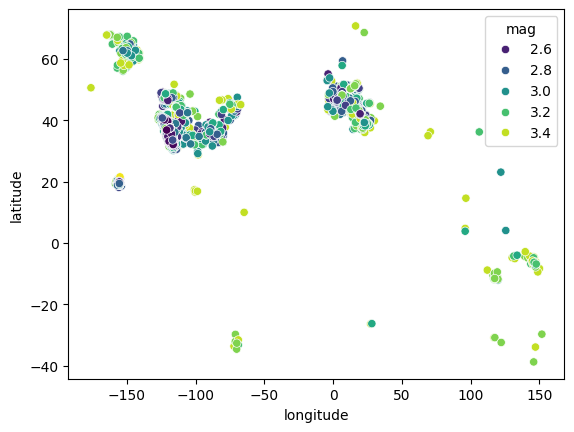

In [ ]:
sns.scatterplot(data = quake[(quake['mag']>2.5) & (quake['mag']<3.5)], x = 'longitude', y = 'latitude', hue = 'mag', palette='viridis')

<Axes: xlabel='mag', ylabel='Count'>

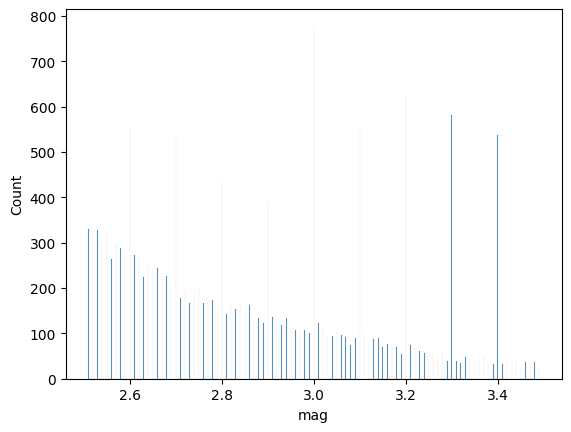

In [ ]:
sns.histplot(quake[(quake['mag']>2.5) & (quake['mag']<3.5)]['mag'],binwidth=0.001)

<Axes: xlabel='depth', ylabel='mag'>

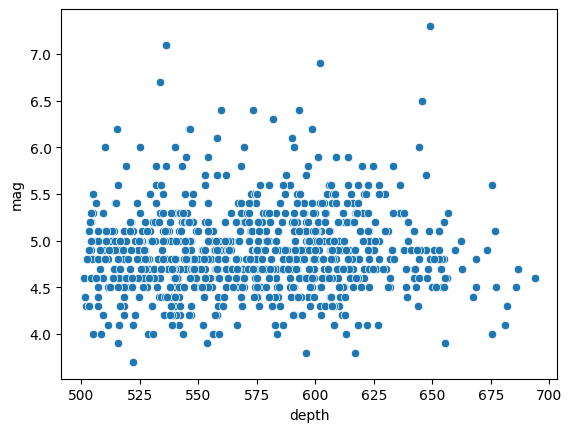

In [ ]:
sns.scatterplot(data = quake[quake['depth']>500], x = 'depth', y = 'mag')

<Axes: xlabel='mag', ylabel='depth'>

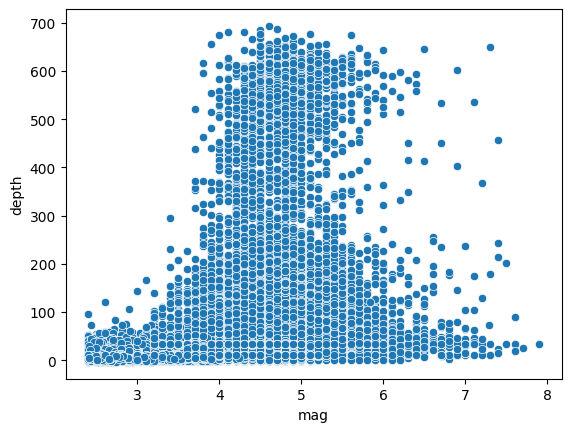

In [ ]:
sns.scatterplot(data = quake, x = 'mag', y = 'depth')

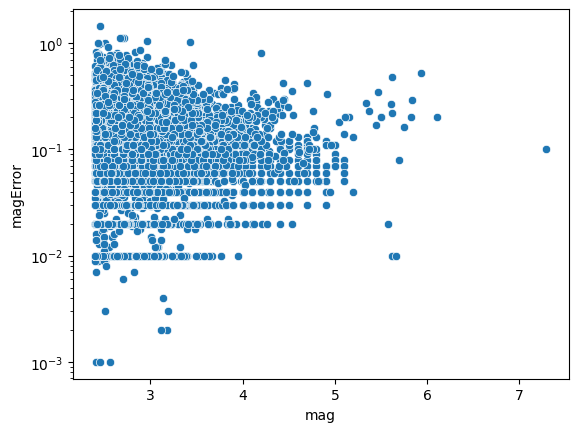

In [ ]:
sns.scatterplot(data = quake, x = 'mag', y = 'magError', )
plt.yscale('log')

plt.show()

In [ ]:
quake_nuclear_explosions = quake[quake['type']=='nuclear explosion']

In [ ]:
quake_nuclear_explosions.head()

,Unnamed: 0,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
857,857,1980-02-28T15:00:00.100Z,37.127,-116.089,0.0,4.4,mb,NaN,NaN,NaN,...,2016-04-02T04:24:14.172Z,"64 km ENE of Beatty, Nevada",nuclear explosion,NaN,NaN,NaN,NaN,reviewed,b,us
1813,1813,1980-03-23T19:36:58.400Z,-21.878,-139.020,0.0,5.7,mb,NaN,NaN,NaN,...,2015-06-16T15:40:01.792Z,"Tuamotu Archipelago, French Polynesia region",nuclear explosion,NaN,NaN,NaN,NaN,reviewed,us,us
2199,2199,1980-03-08T15:35:00.100Z,37.180,-116.083,0.0,3.9,mb,NaN,NaN,NaN,...,2016-04-01T21:56:13.852Z,"59 km SSW of Rachel, Nevada",nuclear explosion,NaN,NaN,NaN,NaN,reviewed,a,us
2519,2519,1980-04-26T17:00:00.100Z,37.248,-116.422,0.0,5.4,mb,NaN,NaN,NaN,...,2016-04-01T21:53:25.182Z,"48 km NE of Beatty, Nevada",nuclear explosion,NaN,NaN,NaN,NaN,reviewed,a,us
2563,2563,1980-04-25T03:56:57.400Z,49.947,78.799,0.0,5.5,mb,NaN,NaN,NaN,...,2015-06-16T17:23:28.286Z,"91 km SSE of Kurchatov, Kazakhstan",nuclear explosion,NaN,NaN,NaN,NaN,reviewed,us,us


In [ ]:
quake_nuclear_explosions['time'].unique()

array(['1980-02-28T15:00:00.100Z', '1980-03-23T19:36:58.400Z',
       '1980-03-08T15:35:00.100Z', '1980-04-26T17:00:00.100Z',
       '1980-04-25T03:56:57.400Z', '1980-04-10T04:06:57.600Z',
       '1980-04-04T05:32:57.300Z', '1980-04-03T14:00:00.100Z',
       '1980-04-01T19:30:58.600Z', '1980-05-22T13:00:00.100Z',
       '1980-05-22T03:56:57.600Z', '1980-05-02T18:46:30.100Z',
       '1980-06-29T02:32:57.700Z', '1980-06-24T15:10:00.100Z',
       '1980-06-16T18:26:57.800Z', '1980-06-12T17:15:00.100Z',
       '1980-06-12T03:26:57.500Z', '1980-07-31T18:19:00.100Z',
       '1980-07-31T03:32:57.700Z', '1980-07-25T19:05:00.100Z',
       '1980-07-19T23:46:58.200Z', '1980-09-25T15:26:30.100Z',
       '1980-09-25T14:45:00.100Z', '1980-09-25T06:21:10.600Z',
       '1980-09-14T02:42:39.300Z', '1980-10-31T18:00:00.100Z',
       '1980-10-24T19:15:00.100Z', '1980-10-12T03:34:14.100Z',
       '1980-10-11T07:09:57.000Z', '1980-10-08T05:59:57.100Z',
       '1980-11-14T16:50:00.100Z', '1980-11-01T12:59:57

<Axes: xlabel='longitude', ylabel='latitude'>

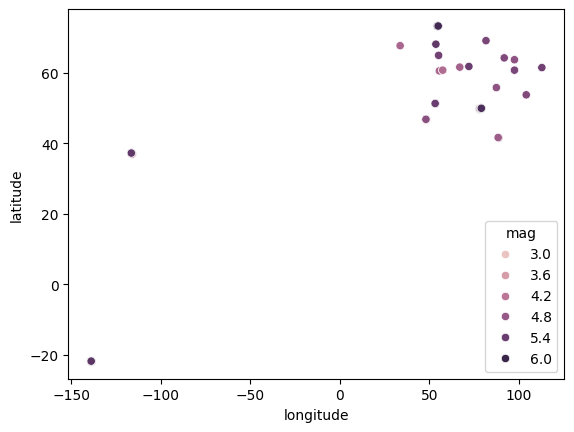

In [ ]:
sns.scatterplot(data = quake_nuclear_explosions, x = 'longitude', y = 'latitude', hue= 'mag')

In [ ]:
# prompt: superimpose the above scatterplot on a world map

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Assuming 'quake' DataFrame is already loaded as in the previous code

# Load a world map (you might need to install plotly if you haven't already)
# !pip install plotly
world_map = px.data.gapminder().query("year==2007")

# Create the scatter plot using Plotly Express for better map integration
fig = px.scatter_geo(quake_nuclear_explosions,
                     lat='latitude', lon='longitude', color='mag',
                     hover_name="place", # add hover info if available in your data
                     projection="natural earth", # adjust projection if needed
                     title="Nuclear Explosions on World Map")


fig.update_traces(marker=dict(size=5, # Adjust marker size as needed
                              line=dict(width=0.5, color='DarkSlateGrey')))

fig.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Assuming 'quake' DataFrame is already loaded as in the previous code

# Load a world map (you might need to install plotly if you haven't already)
# !pip install plotly
world_map = px.data.gapminder().query("year==2007")

# Create the scatter plot using Plotly Express for better map integration
fig = px.scatter_geo(quake,
                     lat='latitude', lon='longitude', color='mag',
                     hover_name="place", # add hover info if available in your data
                     projection="natural earth", # adjust projection if needed
                     title="Earthquake Locations on World Map")


fig.update_traces(marker=dict(size=5, # Adjust marker size as needed
                              line=dict(width=0.5, color='DarkSlateGrey')))

fig.show()